###*Simple and Exponential Moving Average*

In [1]:
import pandas as pd
df=pd.read_csv('/content/output_file.csv')
df.head()

,date,volume,open,high,low,close,adjclose,ticker
0,2018-06-15,3696200,59.630001,60.080002,59.369999,60.009998,60.009998,TMUS
1,2018-07-26,23518700,43.580002,43.830002,43.220001,43.529999,41.350727,CSCO
2,2018-04-13,2828300,108.849998,109.459999,108.519997,109.260002,101.975182,PEP
3,2018-03-14,21141100,45.340000,45.759998,45.090000,45.279999,42.340096,CSCO
4,2019-05-21,2506000,277.089996,279.779999,274.649994,275.329987,275.329987,AVGO


*Data Exploration: Before we perform any operation on a dataset , we need to first build a good understanding of the data quality and quantity.*

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5030 non-null   object 
 1   volume    5030 non-null   int64  
 2   open      5030 non-null   float64
 3   high      5030 non-null   float64
 4   low       5030 non-null   float64
 5   close     5030 non-null   float64
 6   adjclose  5030 non-null   float64
 7   ticker    5030 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 314.5+ KB


In [3]:
df.describe()

,volume,open,high,low,close,adjclose
count,5.030000e+03,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1.922675e+07,317.323750,320.845511,313.372413,317.270793,315.987232
std,2.571300e+07,480.948808,485.342205,475.482149,480.632483,481.144556
min,4.701000e+05,9.080000,9.770000,9.040000,9.530000,9.530000
25%,4.088975e+06,68.797499,69.420002,68.080002,68.774998,68.774998
50%,8.508150e+06,153.040001,155.014999,151.415001,153.555000,151.020363
75%,2.426970e+07,292.687500,297.452492,288.190010,291.955002,291.955002
max,3.250584e+08,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010


In [4]:
df.isnull().sum()

,0
date,0
volume,0
open,0
high,0
low,0
close,0
adjclose,0
ticker,0


In [6]:
df.duplicated().sum()

np.int64(0)

*We need to convert object datatype of Date Column to date-time format to perform our analysis on data*

In [7]:
df['date']=pd.to_datetime(df['date'])

In [8]:
print(df['date'].dtype)

datetime64[ns]


In [9]:
print(df['ticker'].unique())

['TMUS' 'CSCO' 'PEP' 'AVGO' 'AMD' 'AAPL' 'MSFT' 'NFLX' 'TSLA' 'AMZN']


In [11]:
df.groupby('ticker').describe()

date                                                      \
       count                           mean                  min   
ticker                                                             
AAPL     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
AMD      503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
AMZN     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
AVGO     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
CSCO     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
MSFT     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
NFLX     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
PEP      503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
TMUS     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   
TSLA     503  2018-12-31 18:45:05.367793408  2018-01-02 00:00:00   

                                                                       \
                        25%                  50%                  75%   
ticker                                                                  
AAPL    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
AMD     2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
AMZN    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
AVGO    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
CSCO    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
MSFT    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
NFLX    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
PEP     2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
TMUS    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   
TSLA    2018-07-02 12:00:00  2019-01-02 00:00:00  2019-07-02 12:00:00   

                                 volume                ...        close  \
                        max  std  count          mean  ...          max   
ticker                                                 ...                
AAPL    2019-12-31 00:00:00  NaN  503.0  3.101956e+07  ...   293.649994   
AMD     2019-12-31 00:00:00  NaN  503.0  7.543801e+07  ...    46.630001   
AMZN    2019-12-31 00:00:00  NaN  503.0  4.756714e+06  ...  2039.510010   
AVGO    2019-12-31 00:00:00  NaN  503.0  3.385934e+06  ...   327.799988   
CSCO    2019-12-31 00:00:00  NaN  503.0  2.261517e+07  ...    58.049999   
MSFT    2019-12-31 00:00:00  NaN  503.0  2.807952e+07  ...   158.960007   
NFLX    2019-12-31 00:00:00  NaN  503.0  9.660124e+06  ...   418.970001   
PEP     2019-12-31 00:00:00  NaN  503.0  4.702555e+06  ...   140.279999   
TMUS    2019-12-31 00:00:00  NaN  503.0  3.723786e+06  ...    84.250000   
TSLA    2019-12-31 00:00:00  NaN  503.0  8.886117e+06  ...   430.940002   

                   adjclose                                         \
               std    count         mean          min          25%   
ticker                                                               
AAPL     30.000779    503.0   195.042271   139.376251   171.259331   
AMD       8.798058    503.0    23.590437     9.530000    16.270000   
AMZN    173.091233    503.0  1715.604274  1189.010010  1605.509949   
AVGO     30.415053    503.0   263.554234   202.460007   239.739998   
CSCO      4.736166    503.0    45.528112    36.067902    41.456451   
MSFT     18.920582    503.0   113.557543    81.893471    98.431564   
NFLX     42.538718    503.0   324.090874   201.070007   291.565002   
PEP      11.511127    503.0   114.186358    89.748627   104.571262   
TMUS      7.264840    503.0    69.341670    55.580002    63.645000   
TSLA     47.939031    503.0   295.376541   178.970001   257.835007   

                                                           
                50%          75%          max         std  
ticker                                                     
AAPL     188.311905   211.214149   292.163818   30.687277  
AMD       23.680000    30.260000    46.630001 

In [12]:
monthly = df.sort_values('date').groupby(['ticker', df['date'].dt.to_period('M')]).agg({
    'open': 'first',
    'close': 'last',
    'high': 'max',
    'low': 'min'
}).reset_index()

In [23]:
monthly.describe()

,open,close,high,low,SMA_10,SMA_20,EMA_10,EMA_20
count,240.000000,240.000000,240.000000,240.000000,150.000000,50.000000,240.000000,240.000000
mean,314.371583,318.908125,338.287624,292.756208,319.817627,319.365590,308.850384,302.099137
std,478.378556,483.967399,509.251836,447.331085,487.767551,489.766199,464.781297,449.739313
min,9.990000,10.050000,11.360000,9.040000,16.810000,21.431500,12.472682,13.022583
25%,69.334999,69.490002,70.925001,65.187498,69.621500,69.445875,65.596856,65.050462
50%,153.349998,157.720001,164.275002,144.779999,161.654501,155.411750,152.779732,146.900453
75%,292.809998,293.674995,318.227509,263.097504,292.870247,285.242627,297.081543,296.196201
max,2026.500000,2012.709961,2050.500000,1865.000000,1818.025012,1772.576501,1792.316638,1743.623681


In [13]:
monthly['SMA_10'] = monthly.groupby('ticker')['close'].transform(lambda x: x.rolling(window=10).mean())
monthly['SMA_20'] = monthly.groupby('ticker')['close'].transform(lambda x: x.rolling(window=20).mean())

In [14]:
monthly['EMA_10'] = monthly.groupby('ticker')['close'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
monthly['EMA_20'] = monthly.groupby('ticker')['close'].transform(lambda x: x.ewm(span=20, adjust=False).mean())

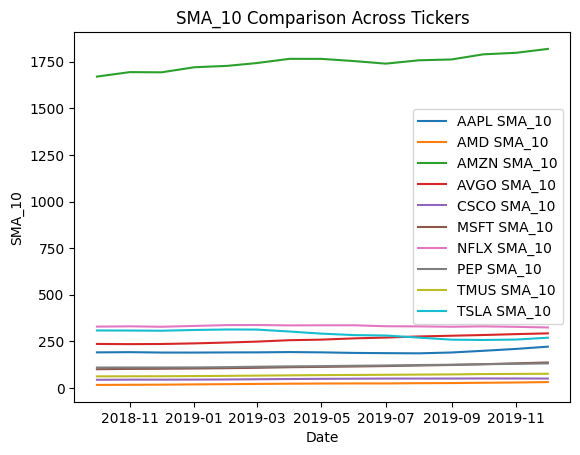

In [15]:
import matplotlib.pyplot as plt

for ticker in monthly['ticker'].unique():
    data = monthly[monthly['ticker'] == ticker]
    plt.plot(data['date'].dt.to_timestamp(), data['SMA_10'], label=f'{ticker} SMA_10')

plt.legend()
plt.xlabel('Date')
plt.ylabel('SMA_10')
plt.title('SMA_10 Comparison Across Tickers')
plt.show()

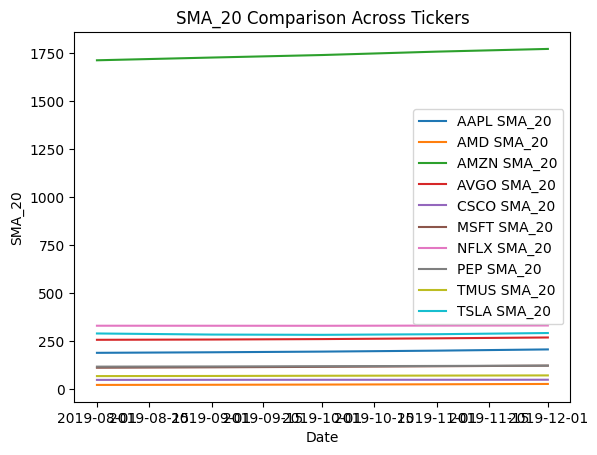

In [16]:
import matplotlib.pyplot as plt

for ticker in monthly['ticker'].unique():
    data = monthly[monthly['ticker'] == ticker]
    plt.plot(data['date'].dt.to_timestamp(), data['SMA_20'], label=f'{ticker} SMA_20')

plt.legend()
plt.xlabel('Date')
plt.ylabel('SMA_20')
plt.title('SMA_20 Comparison Across Tickers')
plt.show()

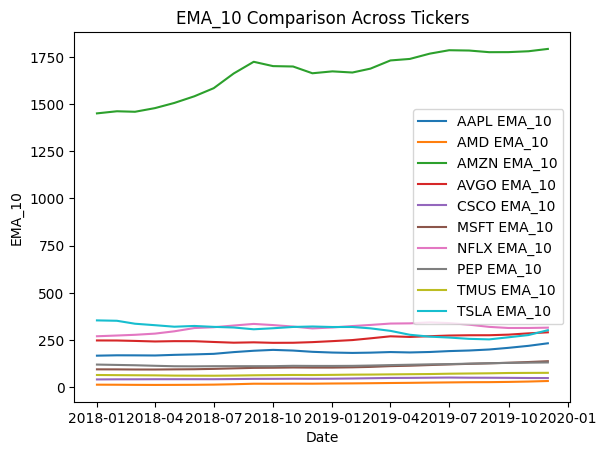

In [18]:
import matplotlib.pyplot as plt

for ticker in monthly['ticker'].unique():
    data = monthly[monthly['ticker'] == ticker]
    plt.plot(data['date'].dt.to_timestamp(), data['EMA_10'], label=f'{ticker} EMA_10')

plt.legend()
plt.xlabel('Date')
plt.ylabel('EMA_10')
plt.title('EMA_10 Comparison Across Tickers')
plt.show()

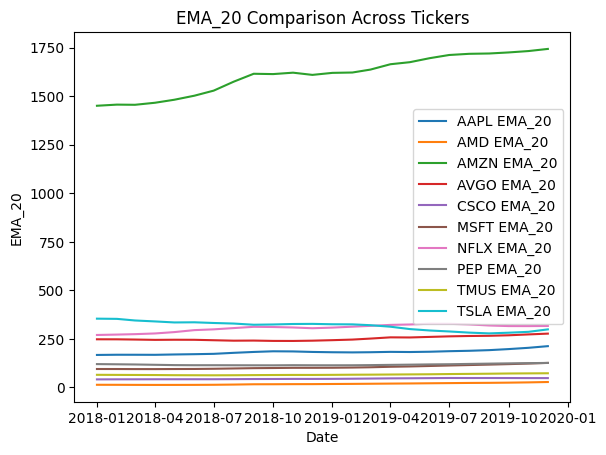

In [19]:
import matplotlib.pyplot as plt

for ticker in monthly['ticker'].unique():
    data = monthly[monthly['ticker'] == ticker]
    plt.plot(data['date'].dt.to_timestamp(), data['EMA_20'], label=f'{ticker} EMA_20')

plt.legend()
plt.xlabel('Date')
plt.ylabel('EMA_20')
plt.title('EMA_20 Comparison Across Tickers')
plt.show()

In [20]:
for ticker in monthly['ticker'].unique():
    df_ticker = monthly[monthly['ticker'] == ticker]
    df_ticker.to_csv(f'result_{ticker}.csv', index=False)